# Project: Investigate a TMBD-movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>We have investigated the TMBD-movie data and it is a data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),it contains many infromation about the movies like the revenue,badget,popularity runtime,company,director and some other infromation 

### Question(s) for Analysis

1) what is the movie and its director with the highest revenue?
2) what is the movie withe the highest budget?
3) Does the budget affect revenue?
4) Does the movie run time affect revenue?
5) Does rhe release year affect revenue?

In [2]:
#imporing needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\al\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\al\\AppData\\Local\\Temp\\pip-install-13nmozsz\\pandas_a819765ca0f549fea9105282ddca7859\\setup.py'"'"'; __file__='"'"'C:\\Users\\al\\AppData\\Local\\Temp\\pip-install-13nmozsz\\pandas_a819765ca0f549fea9105282ddca7859\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\al\AppData\Local\Temp\pip-wheel-r9465nbv'
       cwd: C:\Users\al\AppData\Local\Temp\pip-install-13nmozsz\pandas_a819765ca0f549fea9105282ddca7859\
  Complete output (907 lines):
  running bdist_wheel
  running build
  running build_p


  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
    Running setup.py install for pandas: started
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\al\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\pandas-1.3.4.dist-info\
   from C:\Users\al\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\~andas-1.3.4.dist-info
  Moving to c:\users\al\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\pandas\
   from C:\Users\al\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\~an

  copying pandas\util\_decorators.py -> build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\_depr_module.py -> build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\_doctools.py -> build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\_exceptions.py -> build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\_print_versions.py -> build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\_tester.py -> build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\_test_decorators.py -> build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\_validators.py -> build\lib.win-amd64-3.9\pandas\util
  copying pandas\util\__init__.py -> build\lib.win-amd64-3.9\pandas\util
  creating build\lib.win-amd64-3.9\pandas\_config
  copying pandas\_config\config.py -> build\lib.win-amd64-3.9\pandas\_config
  copying pandas\_config\dates.py -> build\lib.win-amd64-3.9\pandas\_config
  copying pandas\_config\display.py -> build\lib.win-amd64-3.9\pandas\_config
  copying pandas\_config\localizat

<a id='wrangling'></a>
## Data Wrangling



### Data Gathering

In [30]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Assessing

In [31]:
# looking at general infromation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [32]:
# looking for NAN values
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [33]:
# looking at the values that don't make sense
df[df.budget < 100]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [34]:
# looking at the values that don't make sense
df[df.runtime < 30]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
216,286192,tt3824386,0.640151,0,0,Lava,Napua Greig|Kuana Torres Kahele,http://www.pixar.com/short_films/Theatrical-Sh...,James Ford Murphy,NaN,...,The story follows the love story of two volcan...,7,Animation|Comedy|Family|Fantasy|Music,Pixar Animation Studios,6/19/15,298,7.3,2015,0.000000e+00,0.0
279,355338,tt4941804,0.442835,0,0,Riley's First Date?,Amy Poehler|Phyllis Smith|Bill Hader|Lewis Bla...,NaN,Josh Cooley,NaN,...,"Riley, now 12, is hanging out at home with her...",5,Animation|Family,Walt Disney Pictures|Pixar Animation Studios,11/3/15,137,7.3,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,13675,tt0064349,0.528660,0,0,Frosty the Snowman,Jimmy Durante|Billy De Wolfe|Jackie Vernon|Pau...,NaN,"Jules Bass|Arthur Rankin, Jr.",NaN,...,A discarded silk top-hat becomes the focus of ...,25,Family|Animation|TV Movie,Rankin/Bass Productions,12/7/69,43,6.7,1969,0.000000e+00,0.0
10754,3171,tt0064064,0.002757,0,0,Bambi Meets Godzilla,NaN,NaN,Marv Newland,NaN,...,"Bambi is nibbling the grass, unaware of the up...",2,Animation|Comedy,NaN,1/1/69,12,5.6,1969,0.000000e+00,0.0
10820,13377,tt0060345,1.227582,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,NaN,Chuck Jones|Ben Washam,"You're a mean one, Mr. Grinch",...,"Bitter and hateful, the Grinch is irritated at...",26,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,12/18/66,286,7.1,1966,2.116175e+06,0.0
10839,13353,tt0060550,0.276133,0,0,"It's the Great Pumpkin, Charlie Brown",Christopher Shea|Sally Dryer|Kathy Steinberg|A...,NaN,Bill Melendez,Every year he rises from the pumpkin patch...,...,"This classic ""Peanuts"" tale focuses on the thu...",25,Family|Animation,Warner Bros. Home Video,10/27/66,49,7.2,1966,0.000000e+00,0.0


In [35]:
# looking at the values that don't make sense
df[df.runtime > 300]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1865,220903,tt1533395,0.102223,0,0,Life,David Attenborough|Oprah Winfrey,http://www.bbc.co.uk/programmes/b00lbpcy,Martha Holmes|Simon Blakeney|Stephen Lyle,From the Makers of Planet Earth,...,David Attenborough's legendary BBC crew explai...,500,Documentary,British Broadcasting Corporation (BBC),12/14/09,24,7.0,2009,0.000000e+00,0.000000e+00
2107,43434,tt1321865,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,NaN,Olivier Assayas,The man who hijacked the world,...,"The story of Venezuelan revolutionary, Ilich R...",338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,5/19/10,35,6.2,2010,1.800000e+07,8.712790e+05
2170,367186,tt1453159,0.082894,0,0,The Pillars of the Earth,Ian McShane|Matthew Macfadyen|Eddie Redmayne|H...,NaN,Sergio Mimica-Gezzan,NaN,...,The Pillars of the Earth is an eight-part 2010...,421,Drama|History|Romance,Scott Free Productions|Tandem Communications|T...,7/23/10,22,7.3,2010,0.000000e+00,0.000000e+00
2214,189197,tt0374463,0.757082,120000000,0,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,http://www.hbo.com/the-pacific/index.html,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,Hell was an ocean away,...,"A 10-part mini-series from the creators of ""Ba...",540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,5/16/10,183,7.8,2010,1.200000e+08,0.000000e+00
2722,331214,tt0185906,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,...,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,9/9/01,313,8.0,2001,0.000000e+00,1.539360e+08
2843,200813,tt0296310,0.114027,0,0,The Blue Planet,David Attenborough,NaN,Alastair Fothergill,NaN,...,"The Blue Planet, the definitive exploration of...",400,Documentary,BBC Films,9/12/01,22,6.9,2001,0.000000e+00,0.000000e+00
3141,54102,tt0995832,0.336308,0,0,Generation Kill,Alexander SkarsgÃ¥rd|James Ransone|Lee Tergese...,NaN,Susanna White|Simon Cellan Jones,The New Face Of American War,...,Marines prepare to invade Iraq at the beginnin...,470,Drama|War|History,Company Pictures,7/13/08,28,6.6,2008,0.000000e+00,0.000000e+00
3356,118309,tt0472027,0.136540,0,0,John Adams,Paul Giamatti|Laura Linney|Stephen Dillane|Tom...,http://www.hbo.com/john-adams/index.html,Tom Hooper,Join or Die,...,"The life of one of the USA's Founding Fathers,...",501,History|Drama,NaN,3/16/08,33,6.6,2008,0.000000e+00,0.000000e+00
3886,202241,tt1492030,0.044221,20000000,0,Mildred Pierce,Kate Winslet|Evan Rachel Wood|Guy Pearce|Mare ...,http://www.hbo.com/mildred-pierce/index.html,Todd Haynes,Having It All Would Cost Her Everything.,...,"A newly divorced, uniquely independent woman s...",336,Drama,Home Box Office (HBO)|Metro-Goldwyn-Mayer (MGM),3/27/11,21,6.6,2011,1.938796e+07,0.000000e+00
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.000000e+00,0.000000e+00


In [36]:
# Looking for duplicated rows
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Issues in our data

#### Issue 1
- We have useless columns like(`popularity`,`cast`,`tagline`,`keywords` ,`homepage`,`overview`,`production_companies`,`release_date`,`budget_adj`,`revenue_adj`)
#### Issue 2
- There are missing values in our useful columns like(`director`)
#### Issue 3
- There are some values in columns (`budget`,`revenue`,`runtime`) that does not make sense
#### Issue 4
- There is a duplicated row


### Data Cleaning


In [37]:
# creating cleaned data frame called df_clean
df_clean = df.copy()

#### issue 1
- We will drope all useless columns(`popularity`,`cast`,`tagline`,`keywords` ,`homepage`,`overview`,`production_companies`,`release_date`,`budget_adj`,`revenue_adj`)

In [38]:
useless_columns = ['popularity','cast','tagline', 'keywords','homepage','overview','production_companies','release_date','budget_adj','revenue_adj']
for col in useless_columns:
    df_clean.drop(col, axis=1, inplace=True)
df_clean.head()

,id,imdb_id,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,tt2908446,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,tt2820852,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


#### Issue 2
- We will drop missing values in (`director`,`genres`)

In [39]:
df_clean.dropna(inplace=True)

In [40]:
# check if there is any missing values
df_clean.isnull().any()

id                False
imdb_id           False
budget            False
revenue           False
original_title    False
director          False
runtime           False
genres            False
vote_count        False
vote_average      False
release_year      False
dtype: bool

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10796 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10796 non-null  int64  
 1   imdb_id         10796 non-null  object 
 2   budget          10796 non-null  int64  
 3   revenue         10796 non-null  int64  
 4   original_title  10796 non-null  object 
 5   director        10796 non-null  object 
 6   runtime         10796 non-null  int64  
 7   genres          10796 non-null  object 
 8   vote_count      10796 non-null  int64  
 9   vote_average    10796 non-null  float64
 10  release_year    10796 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1012.1+ KB


#### Issue 3
- We will take the minimum movie budget or revenue is 300,000 and make all values that less than 300,000 equal 300,000$
- we will take the minmum movie run time is 30 min and the maximum is 300 min and drop all values that are out this region

In [42]:
# covert all small values to 300,000
df_clean.budget[df_clean.budget < 300000] = 300000

C:\Users\al\AppData\Local\Temp/ipykernel_6352/875517293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.budget[df_clean.budget < 300000] = 300000


In [43]:
# covert all small values to 300,000
df_clean.revenue[df_clean.revenue < 300000] = 300000

C:\Users\al\AppData\Local\Temp/ipykernel_6352/105751649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.revenue[df_clean.revenue < 300000] = 300000


In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10796 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10796 non-null  int64  
 1   imdb_id         10796 non-null  object 
 2   budget          10796 non-null  int64  
 3   revenue         10796 non-null  int64  
 4   original_title  10796 non-null  object 
 5   director        10796 non-null  object 
 6   runtime         10796 non-null  int64  
 7   genres          10796 non-null  object 
 8   vote_count      10796 non-null  int64  
 9   vote_average    10796 non-null  float64
 10  release_year    10796 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1012.1+ KB


In [18]:
# dropping the values that less than 30 min
df_clean.drop(df_clean[df_clean.runtime < 30].index, inplace=True)

In [19]:
# dropping the values that more than 300 min
df_clean.drop(df_clean[df_clean.runtime > 300].index, inplace=True)

In [45]:
# testing our data
(df_clean.revenue < 300000).any()

False

In [46]:
# testing our data
(df_clean.budget < 300000).any()

False

In [47]:
# testing our data
(df_clean.runtime < 30).any()

True

In [48]:
# testing our data
(df_clean.runtime > 300).any()

True

#### Issue 4
- We will drop duplicates

In [49]:
df_clean.drop_duplicates(inplace=True)

In [50]:
# testing our data
df_clean.duplicated().any()

False

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10795 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10795 non-null  int64  
 1   imdb_id         10795 non-null  object 
 2   budget          10795 non-null  int64  
 3   revenue         10795 non-null  int64  
 4   original_title  10795 non-null  object 
 5   director        10795 non-null  object 
 6   runtime         10795 non-null  int64  
 7   genres          10795 non-null  object 
 8   vote_count      10795 non-null  int64  
 9   vote_average    10795 non-null  float64
 10  release_year    10795 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1012.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis





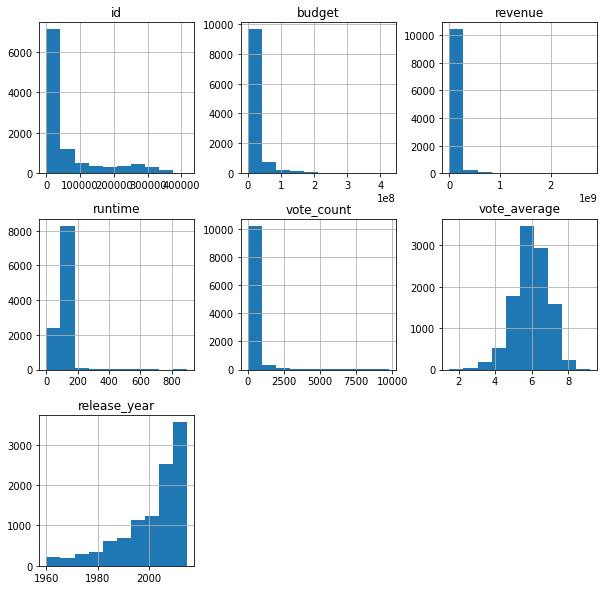

In [92]:
#overview about data relations
df_clean.hist(figsize=(10,10));

In [52]:
# some statistical informantion about our data
df_clean.describe()

,id,budget,revenue,runtime,vote_count,vote_average,release_year
count,10795.000000,1.079500e+04,1.079500e+04,10795.000000,10795.000000,10795.000000,10795.000000
mean,65560.482446,1.487831e+07,4.025611e+07,102.214266,218.691709,5.970394,2001.285966
std,91751.943252,3.091644e+07,1.172846e+08,30.764036,577.283167,0.932914,12.821353
min,5.000000,3.000000e+05,3.000000e+05,0.000000,10.000000,1.500000,1960.000000
25%,10568.000000,3.000000e+05,3.000000e+05,90.000000,17.000000,5.400000,1995.000000
50%,20453.000000,3.000000e+05,3.000000e+05,99.000000,39.000000,6.000000,2006.000000
75%,74684.000000,1.588747e+07,2.461915e+07,112.000000,147.000000,6.600000,2011.000000
max,417859.000000,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


### Research Question 1 (what is the movie and its director with the highest revenue?)

In [61]:
#showing information about the movie with the highest revenue
df_clean.loc[df_clean['revenue'].idxmax()]

id                                                   19995
imdb_id                                          tt0499549
budget                                           237000000
revenue                                         2781505847
original_title                                      Avatar
director                                     James Cameron
runtime                                                162
genres            Action|Adventure|Fantasy|Science Fiction
vote_count                                            8458
vote_average                                           7.1
release_year                                          2009
Name: 1386, dtype: object

> 'Avatar' is the movie with the highest revenue and its director 'James Cameron'

### Research Question 2  (what is the movie withe the highest budget?)

In [63]:
#showing information about the movie with the highest budget
df_clean.loc[df_clean['budget'].idxmax()]

id                                                    46528
imdb_id                                           tt1032751
budget                                            425000000
revenue                                            11087569
original_title                            The Warrior's Way
director                                         Sngmoo Lee
runtime                                                 100
genres            Adventure|Fantasy|Action|Western|Thriller
vote_count                                               74
vote_average                                            6.4
release_year                                           2010
Name: 2244, dtype: object

>"The Warrior's Way" is the movie with the highest budget

### Research Question 3  (Does the budget affect revenue?)

Text(0.5, 1.0, 'the relation between the budget and revenue')

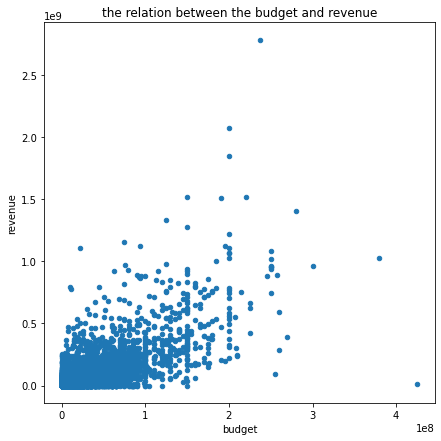

In [68]:
df_clean.plot(x='budget',y='revenue',kind='scatter',figsize=(7,7));
plt.title('the relation between the budget and revenue')

> from the scatter relation we notic that the budget affect revenue but the highest budget doesn't mean a highest revenue

### Research Question 4  (Does the movie run time affect revenue?)

Text(0.5, 1.0, 'the relation between the movie run time and revenue')

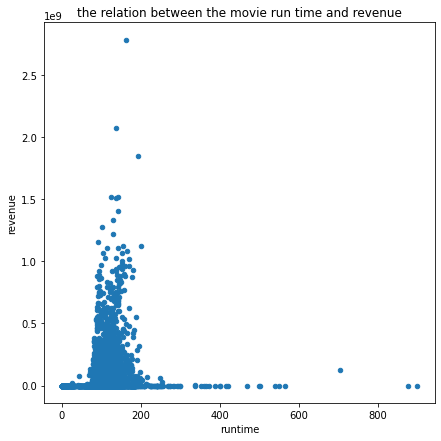

In [80]:
df_clean.plot(x='runtime',y='revenue',kind='scatter',figsize=(7,7));
plt.title('the relation between the movie run time and revenue')

> from the scatter relation we notic that the run time between(100-200) give us the highest revenue

### Research Question 5  (Does the release year affect revenue?)

Text(0.5, 1.0, 'the relation between release year and revenue')

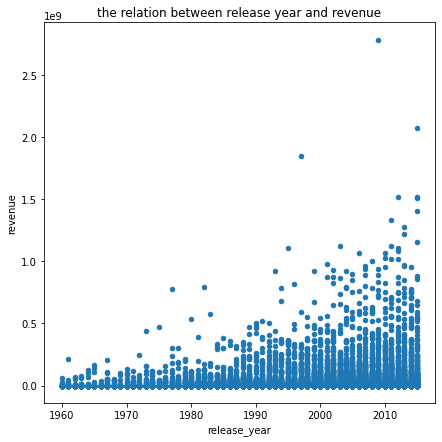

In [81]:
df_clean.plot(x='release_year',y='revenue',kind='scatter',figsize=(7,7));
plt.title('the relation between release year and revenue')

>we notice that the movies in the last years form our data range achieved a high revenue

<a id='conclusions'></a>
## Conclusions

>from our exploration we got the ansowers to our questions.
* 'Avatar' is the movie with the highest revenue and its director 'James Cameron'

* "The Warrior's Way" is the movie with the highest budget.

* from the scatter relation we notic that the budget affect revenue but the highest budget doesn't mean a highest revenue.

* from the scatter relation we notic that the run time between(100-200) give us the highest revenue.

* we notice that the movies in the last years form our data range achieved a high revenue.


### Limitations
we face some problems in our data like some columns which needn't it in our scope of analysis so we dropped it from the data and some missing values in our useful coulmns and also dropped them.
also some values doesn't make sense and some duplicated rows so dropped them.
finally we got a clean data for our investigation to achieve our needed questions.

## Submitting your Project 



In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0